In [1]:
# CELL 1: Setup Portable Paths
import os
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import difflib
import traceback

# Get project root automatically
current_dir = Path(os.getcwd())
if current_dir.name == 'notebooks':
    project_root = current_dir.parent
else:
    project_root = current_dir

# Define paths relative to project root
DATA_DIR = project_root / "data"
RAW_DATA_DIR = DATA_DIR / "raw"
PROCESSED_DATA_DIR = DATA_DIR / "processed"
OUTPUT_DIR = project_root / "output"
FIGURES_DIR = OUTPUT_DIR / "figures"

# Create directories if they don't exist
for d in [RAW_DATA_DIR, PROCESSED_DATA_DIR, FIGURES_DIR]:
    d.mkdir(parents=True, exist_ok=True)

# Your data file - CHANGE THIS to your actual filename
DATA_FILE = "sisepuede_raw_inputs_latest_LKA.xlsx"
file_path = RAW_DATA_DIR / DATA_FILE

print(f"✓ Project root: {project_root}")
print(f"✓ Data directory: {DATA_DIR}")
print(f"Expecting file at: {file_path}")
print(f"Exists: {file_path.exists()}")

✓ Project root: C:\Users\shanp\Projects\SiSePuede
✓ Data directory: C:\Users\shanp\Projects\SiSePuede\data
Expecting file at: C:\Users\shanp\Projects\SiSePuede\data\raw\sisepuede_raw_inputs_latest_LKA.xlsx
Exists: True


In [2]:
import os
from pathlib import Path
import pandas as pd

# Setup paths
current_dir = Path(os.getcwd())
project_root = current_dir.parent if current_dir.name == 'notebooks' else current_dir
RAW_DATA_DIR = project_root / "data" / "raw"

DATA_FILE = "sisepuede_raw_inputs_latest_LKA.xlsx"
file_path = RAW_DATA_DIR / DATA_FILE

# Check file existence
if not file_path.exists():
    raise FileNotFoundError(f"Excel file not found at {file_path}")

# Load workbook
xls = pd.ExcelFile(file_path)
print(f"Available sheets: {xls.sheet_names}")

# Since there's only one sheet, just use it directly
if len(xls.sheet_names) == 0:
    raise ValueError("No sheets found in the Excel file")

preferred_sheet = xls.sheet_names[0]  # Use the first (and only) sheet
print(f"✓ Loading sheet: {preferred_sheet}")

# Load the sheet into DataFrame
df_raw = pd.read_excel(file_path, sheet_name=preferred_sheet)
print(f"✓ Data loaded successfully: {df_raw.shape}")
display(df_raw.head())

Available sheets: ['sisepuede_raw_inputs_latest_LKA']
✓ Loading sheet: sisepuede_raw_inputs_latest_LKA
✓ Data loaded successfully: (56, 2420)


,year,ef_ippu_tonne_nf3_per_tonne_production_chemicals,ef_ippu_tonne_nf3_per_tonne_production_electronics,ef_ippu_tonne_sf6_per_mmm_gdp_other_product_manufacturing,ef_ippu_tonne_sf6_per_tonne_production_chemicals,ef_ippu_tonne_sf6_per_tonne_production_electronics,ef_ippu_tonne_sf6_per_tonne_production_metals,frac_agrc_bevs_and_spices_cl2_dry,frac_agrc_cereals_cl2_dry,frac_agrc_fibers_cl2_dry,...,nemomod_entc_scalar_availability_factor_pp_gas_ccs,nemomod_entc_scalar_availability_factor_pp_geothermal,nemomod_entc_scalar_availability_factor_pp_hydropower,nemomod_entc_scalar_availability_factor_pp_nuclear,nemomod_entc_scalar_availability_factor_pp_ocean,nemomod_entc_scalar_availability_factor_pp_oil,nemomod_entc_scalar_availability_factor_pp_solar,nemomod_entc_scalar_availability_factor_pp_waste_incineration,nemomod_entc_scalar_availability_factor_pp_wind,iso_alpha_3
0,2015,0,0,0,0,0,0,0.000398,0.000398,0.000398,...,1,1,1,1,1,1,1,1,1,LKA
1,2016,0,0,0,0,0,0,0.000398,0.000398,0.000398,...,1,1,1,1,1,1,1,1,1,LKA
2,2017,0,0,0,0,0,0,0.000398,0.000398,0.000398,...,1,1,1,1,1,1,1,1,1,LKA
3,2018,0,0,0,0,0,0,0.000398,0.000398,0.000398,...,1,1,1,1,1,1,1,1,1,LKA
4,2019,0,0,0,0,0,0,0.000398,0.000398,0.000398,...,1,1,1,1,1,1,1,1,1,LKA


In [3]:
# CELL 3: Read Data from Sheet
try:
    df_raw = pd.read_excel(file_path, sheet_name=preferred_sheet, header=0)
    used_sheet = preferred_sheet
    print(f"✓ Loaded sheet: {used_sheet}")
except Exception as e:
    print(f"Error loading sheet: {e}")
    # Try with no header and use first row as headers
    df_raw = pd.read_excel(file_path, sheet_name=0)
    # Set first row as column names
    df_raw.columns = df_raw.iloc[0]
    df_raw = df_raw.drop(0).reset_index(drop=True)
    print(f"✓ Loaded with first row as header")

print("Raw data shape:", df_raw.shape)
display(df_raw.head(10))

✓ Loaded sheet: sisepuede_raw_inputs_latest_LKA
Raw data shape: (56, 2420)


,year,ef_ippu_tonne_nf3_per_tonne_production_chemicals,ef_ippu_tonne_nf3_per_tonne_production_electronics,ef_ippu_tonne_sf6_per_mmm_gdp_other_product_manufacturing,ef_ippu_tonne_sf6_per_tonne_production_chemicals,ef_ippu_tonne_sf6_per_tonne_production_electronics,ef_ippu_tonne_sf6_per_tonne_production_metals,frac_agrc_bevs_and_spices_cl2_dry,frac_agrc_cereals_cl2_dry,frac_agrc_fibers_cl2_dry,...,nemomod_entc_scalar_availability_factor_pp_gas_ccs,nemomod_entc_scalar_availability_factor_pp_geothermal,nemomod_entc_scalar_availability_factor_pp_hydropower,nemomod_entc_scalar_availability_factor_pp_nuclear,nemomod_entc_scalar_availability_factor_pp_ocean,nemomod_entc_scalar_availability_factor_pp_oil,nemomod_entc_scalar_availability_factor_pp_solar,nemomod_entc_scalar_availability_factor_pp_waste_incineration,nemomod_entc_scalar_availability_factor_pp_wind,iso_alpha_3
0,2015,0,0,0,0,0,0,0.000398,0.000398,0.000398,...,1,1,1,1,1,1,1,1,1,LKA
1,2016,0,0,0,0,0,0,0.000398,0.000398,0.000398,...,1,1,1,1,1,1,1,1,1,LKA
2,2017,0,0,0,0,0,0,0.000398,0.000398,0.000398,...,1,1,1,1,1,1,1,1,1,LKA
3,2018,0,0,0,0,0,0,0.000398,0.000398,0.000398,...,1,1,1,1,1,1,1,1,1,LKA
4,2019,0,0,0,0,0,0,0.000398,0.000398,0.000398,...,1,1,1,1,1,1,1,1,1,LKA
5,2020,0,0,0,0,0,0,0.000398,0.000398,0.000398,...,1,1,1,1,1,1,1,1,1,LKA
6,2021,0,0,0,0,0,0,0.000398,0.000398,0.000398,...,1,1,1,1,1,1,1,1,1,LKA
7,2022,0,0,0,0,0,0,0.000398,0.000398,0.000398,...,1,1,1,1,1,1,1,1,1,LKA
8,2023,0,0,0,0,0,0,0.000398,0.000398,0.000398,...,1,1,1,1,1,1,1,1,1,LKA
9,2024,0,0,0,0,0,0,0.000398,0.000398,0.000398,...,1,1,1,1,1,1,1,1,1,LKA


In [4]:
# CELL 4
print("Columns (first 80 shown):")
for i, c in enumerate(df_raw.columns[:80], start=1):
    print(f"{i}. {c}")

print("\nColumn dtypes (first 40):")
print(df_raw.dtypes.head(40))

print("\nTop null counts:")
print(df_raw.isnull().sum().sort_values(ascending=False).head(40))

# summary table for convenience
summary = pd.DataFrame({
    "dtype": df_raw.dtypes.astype(str),
    "null_count": df_raw.isnull().sum(),
    "n_unique": df_raw.nunique(dropna=False)
}).sort_values(by="null_count", ascending=False)
display(summary.head(80))


Columns (first 80 shown):
1. year
2. ef_ippu_tonne_nf3_per_tonne_production_chemicals
3. ef_ippu_tonne_nf3_per_tonne_production_electronics
4. ef_ippu_tonne_sf6_per_mmm_gdp_other_product_manufacturing
5. ef_ippu_tonne_sf6_per_tonne_production_chemicals
6. ef_ippu_tonne_sf6_per_tonne_production_electronics
7. ef_ippu_tonne_sf6_per_tonne_production_metals
8. frac_agrc_bevs_and_spices_cl2_dry
9. frac_agrc_cereals_cl2_dry
10. frac_agrc_fibers_cl2_dry
11. frac_agrc_fruits_cl2_dry
12. frac_agrc_herbs_and_other_perennial_crops_cl2_dry
13. frac_agrc_nuts_cl2_dry
14. frac_agrc_other_annual_cl2_dry
15. frac_agrc_other_woody_perennial_cl2_dry
16. frac_agrc_pulses_cl2_dry
17. frac_agrc_rice_cl2_dry
18. frac_agrc_sugar_cane_cl2_dry
19. frac_agrc_tubers_cl2_dry
20. frac_agrc_vegetables_and_vines_cl2_dry
21. frac_agrc_bevs_and_spices_cl1_temperate
22. frac_agrc_cereals_cl1_temperate
23. frac_agrc_fibers_cl1_temperate
24. frac_agrc_fruits_cl1_temperate
25. frac_agrc_herbs_and_other_perennial_crops_cl1

,dtype,null_count,n_unique
iso_alpha_3,object,0,1
year,int64,0,56
ef_ippu_tonne_nf3_per_tonne_production_chemicals,int64,0,1
ef_ippu_tonne_nf3_per_tonne_production_electronics,int64,0,1
nemomod_entc_input_activity_ratio_fuel_production_fp_natural_gas_liquefaction_electricity,float64,0,1
...,...,...,...
frac_frst_mangroves_cl1_temperate_nutrient_poor,float64,0,1
elecfuelefficiency_trns_rail_passenger_km_per_kwh,float64,0,1
elecfuelefficiency_trns_rail_freight_km_per_kwh,float64,0,1
frac_enfu_transmission_loss_fuel_electricity,float64,0,1


In [5]:
# CELL 5
# Attempt to import sisepuede examples to get the expected column schema.
example_loaded = False
example_cols = []
try:
    from sisepuede.manager.sisepuede_examples import SISEPUEDEExamples
    examples = SISEPUEDEExamples()
    df_example = examples("input_data_frame")
    example_cols = list(df_example.columns)
    example_loaded = True
    print("Loaded SISEPUEDE example input shape:", df_example.shape)
    print("Example columns (first 60):", example_cols[:60])
except Exception as e:
    print("Could NOT load SISEPUEDE example automatically. That's ok — we'll proceed with data prep.")
    print("Error (truncated):", str(e)[:300])


C:\Users\shanp\miniconda3\envs\sisepuede\Lib\site-packages\munch\__init__.py:24: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
C:\Users\shanp\miniconda3\envs\sisepuede\Lib\site-packages\sisepuede\utilities\_toolbox.py:533: UserWarning: Path 'C:\Users\shanp\miniconda3\envs\sisepuede\Lib\site-packages\sisepuede\out\sisepuede_run_2025-12-20T21;05;04.565177' not found. It will not be created.
  warnings.warn(msg)
C:\Users\shanp\miniconda3\envs\sisepuede\Lib\site-packages\sisepuede\core\model_attributes.py:6830: UserWarning: 

                        MISSIONSEARCHNOTE: As of 2023-10-06, there is a temporary solution 
                        implemeted in ModelAttributes.get_variable_to_simplex_group_dictionary() 
                        to ensure that transition probability r

Loaded SISEPUEDE example input shape: (36, 2419)
Example columns (first 60): ['region', 'time_period', 'avgload_trns_freight_tonne_per_vehicle_aviation', 'avgload_trns_freight_tonne_per_vehicle_rail_freight', 'avgload_trns_freight_tonne_per_vehicle_road_heavy_freight', 'avgload_trns_freight_tonne_per_vehicle_water_borne', 'avgmass_lvst_animal_buffalo_kg', 'avgmass_lvst_animal_cattle_dairy_kg', 'avgmass_lvst_animal_cattle_nondairy_kg', 'avgmass_lvst_animal_chickens_kg', 'avgmass_lvst_animal_goats_kg', 'avgmass_lvst_animal_horses_kg', 'avgmass_lvst_animal_mules_kg', 'avgmass_lvst_animal_pigs_kg', 'avgmass_lvst_animal_sheep_kg', 'climate_change_factor_gnrl_hydropower_availability', 'consumpinit_inen_energy_tj_per_tonne_production_mining', 'consumpinit_scoe_tj_per_mmmgdp_commercial_municipal_elec_appliances', 'cost_enfu_fuel_biofuels_usd_per_m3', 'cost_enfu_fuel_biogas_usd_per_mmbtu', 'cost_enfu_fuel_biomass_usd_per_tonne', 'cost_enfu_fuel_coal_usd_per_tonne', 'cost_enfu_fuel_coke_usd_per_

In [6]:
# CELL 6
my_cols = list(df_raw.columns)
mapping_suggestion = {}
if example_loaded and example_cols:
    for ex in example_cols:
        matches = difflib.get_close_matches(ex, my_cols, n=1, cutoff=0.45)
        if matches:
            mapping_suggestion[matches[0]] = ex

    print("Auto mapping suggestions (your_col -> example_col):")
    for your_col, ex_col in mapping_suggestion.items():
        print(f"'{your_col}'  ->  '{ex_col}'")
else:
    print("No example columns available for mapping suggestions. You will need to map manually if required.")


Auto mapping suggestions (your_col -> example_col):
'time_period'  ->  'time_period'
'avgload_trns_freight_tonne_per_vehicle_aviation'  ->  'avgload_trns_freight_tonne_per_vehicle_aviation'
'avgload_trns_freight_tonne_per_vehicle_rail_freight'  ->  'avgload_trns_freight_tonne_per_vehicle_rail_freight'
'avgload_trns_freight_tonne_per_vehicle_road_heavy_freight'  ->  'avgload_trns_freight_tonne_per_vehicle_road_heavy_freight'
'avgload_trns_freight_tonne_per_vehicle_water_borne'  ->  'avgload_trns_freight_tonne_per_vehicle_water_borne'
'avgmass_lvst_animal_buffalo_kg'  ->  'avgmass_lvst_animal_buffalo_kg'
'avgmass_lvst_animal_cattle_dairy_kg'  ->  'avgmass_lvst_animal_cattle_dairy_kg'
'avgmass_lvst_animal_cattle_nondairy_kg'  ->  'avgmass_lvst_animal_cattle_nondairy_kg'
'avgmass_lvst_animal_chickens_kg'  ->  'avgmass_lvst_animal_chickens_kg'
'avgmass_lvst_animal_goats_kg'  ->  'avgmass_lvst_animal_goats_kg'
'avgmass_lvst_animal_horses_kg'  ->  'avgmass_lvst_animal_horses_kg'
'avgmass_lvst

In [7]:
# CELL 7 (FINAL & ROBUST): Apply Mapping and Handle Multi-Year Data

df_mapped = df_raw.copy()

# =========================================================
# Apply automatic column mapping
# =========================================================
if mapping_suggestion:
    rename_dict = {your_col: ex_col for your_col, ex_col in mapping_suggestion.items()}
    df_mapped = df_mapped.rename(columns=rename_dict)
    print(f"✓ Applied {len(rename_dict)} automatic renames.")
else:
    print("No automatic renames applied.")

# =========================================================
# CRITICAL: Handle Region Column (FORCE SINGLE COUNTRY)
# =========================================================
# Dataset is Sri Lanka only → do NOT auto-detect
df_mapped['region'] = 'sri_lanka'
print("✓ Region set to 'sri_lanka'")

print(f"✓ Region values: {df_mapped['region'].unique()}")

# =========================================================
# CRITICAL: Handle Time Period Properly
# =========================================================
if 'time_period' not in df_mapped.columns:

    # Look for year-like columns
    year_cols = [c for c in df_mapped.columns if any(
        keyword in c.lower() for keyword in ['year', 'time', 'period', 'date']
    )]

    if year_cols:
        chosen = year_cols[0]
        print(f"✓ Found year column: '{chosen}'")

        # Convert year column safely
        df_mapped['year'] = pd.to_numeric(df_mapped[chosen], errors='coerce')

        # Check if these look like actual calendar years
        if df_mapped['year'].min(skipna=True) > 1900:
            base_year = 2015  # SISEPUEDE standard
            df_mapped['time_period'] = df_mapped['year'] - base_year
            print(f"✓ Converted years to time_period (base year: {base_year})")
            print(f"  Year range: {df_mapped['year'].min():.0f} - {df_mapped['year'].max():.0f}")
        else:
            # Already time periods
            df_mapped['time_period'] = df_mapped['year']
            print("✓ Using existing time_period values")

    else:
        print("⚠ No year column found!")
        print("⚠ Creating sequential time_period values")
        df_mapped['time_period'] = range(len(df_mapped))

# =========================================================
# FINAL SAFETY: Clean time_period (NO NaNs, NO crashes)
# =========================================================
df_mapped['time_period'] = (
    pd.to_numeric(df_mapped['time_period'], errors='coerce')
    .fillna(0)
    .astype(int)
)

# =========================================================
# Final sanity checks
# =========================================================
print(f"\n✓ df_mapped shape: {df_mapped.shape}")
print(f"✓ Time periods: {df_mapped['time_period'].nunique()} unique values")
print("✓ NaN check:")
print(df_mapped[['region', 'time_period']].isna().sum())

display(df_mapped[['time_period', 'region']].head(10))


✓ Applied 2418 automatic renames.
✓ Region set to 'sri_lanka'
✓ Region values: ['sri_lanka']

✓ df_mapped shape: (56, 2421)
✓ Time periods: 56 unique values
✓ NaN check:
region         0
time_period    0
dtype: int64


,time_period,region
0,0,sri_lanka
1,1,sri_lanka
2,2,sri_lanka
3,3,sri_lanka
4,4,sri_lanka
5,5,sri_lanka
6,6,sri_lanka
7,7,sri_lanka
8,8,sri_lanka
9,9,sri_lanka


In [8]:
# CELL 8 (NEW): Validate Multi-Year Structure
print("="*60)
print("MULTI-YEAR DATA VALIDATION")
print("="*60)

# Check data structure
n_regions = df_mapped['region'].nunique()
n_periods = df_mapped['time_period'].nunique()
expected_rows = n_regions * n_periods
actual_rows = len(df_mapped)

print(f"\n📊 Data Structure:")
print(f"  Regions: {n_regions}")
print(f"  Time periods: {n_periods}")
print(f"  Expected rows: {expected_rows}")
print(f"  Actual rows: {actual_rows}")

if actual_rows != expected_rows:
    print(f"\n⚠ WARNING: Row count mismatch!")
    print(f"  Missing/duplicate data may exist")

# Check each region's time series
print(f"\n📅 Time Series by Region:")
for region in df_mapped['region'].unique():
    region_data = df_mapped[df_mapped['region'] == region]
    periods = sorted(region_data['time_period'].unique())
    
    print(f"\n  {region}:")
    print(f"    Rows: {len(region_data)}")
    print(f"    Time periods: {len(periods)}")
    print(f"    Range: {min(periods)} to {max(periods)}")
    
    # Check for gaps
    expected = set(range(min(periods), max(periods) + 1))
    actual = set(periods)
    missing = sorted(expected - actual)
    
    if missing:
        print(f"    ⚠ GAPS found: {missing}")
    else:
        print(f"    ✓ Complete time series (no gaps)")
    
    # Check for duplicates
    duplicates = region_data[region_data.duplicated(subset=['time_period'], keep=False)]
    if len(duplicates) > 0:
        print(f"    ⚠ DUPLICATES found: {len(duplicates)} rows")
        print(f"      Duplicate periods: {sorted(duplicates['time_period'].unique())}")

# SISEPUEDE expects at least 36 time periods (2015-2050)
if n_periods < 36:
    print(f"\n⚠ WARNING: SISEPUEDE typically needs 36+ time periods")
    print(f"  You have: {n_periods}")
    print(f"  Consider extending your data to 2050 or using interpolation")

MULTI-YEAR DATA VALIDATION

📊 Data Structure:
  Regions: 1
  Time periods: 56
  Expected rows: 56
  Actual rows: 56

📅 Time Series by Region:

  sri_lanka:
    Rows: 56
    Time periods: 56
    Range: 0 to 55
    ✓ Complete time series (no gaps)


In [9]:
# CELL 9: Compare with SISEPUEDE Example Structure
if example_loaded:
    example_set = set(example_cols)
    my_set = set(df_mapped.columns)
    missing = sorted(example_set - my_set)
    extra = sorted(my_set - example_set)
    
    print(f"📋 Column Comparison with SISEPUEDE Example:")
    print(f"\n  Example has: {len(example_cols)} columns")
    print(f"  Your data has: {len(df_mapped.columns)} columns")
    print(f"  Missing: {len(missing)} columns")
    print(f"  Extra: {len(extra)} columns")
    print(f"  Matching: {len(example_set & my_set)} columns")
    
    if len(missing) > 0:
        print(f"\n⚠ Missing columns (showing first 50):")
        for i, col in enumerate(missing[:50], 1):
            print(f"  {i}. {col}")
    
    if len(extra) > 20:
        print(f"\n📝 Extra columns (showing first 30):")
        for i, col in enumerate(extra[:30], 1):
            print(f"  {i}. {col}")
else:
    print("Example not loaded — skipping comparison.")

📋 Column Comparison with SISEPUEDE Example:

  Example has: 2419 columns
  Your data has: 2421 columns
  Missing: 0 columns
  Extra: 2 columns
  Matching: 2419 columns


In [10]:
# CELL 10: Handle Missing SISEPUEDE Columns (Critical Variables)
if example_loaded and len(missing) > 0:
    print("="*60)
    print("FILLING MISSING CRITICAL COLUMNS")
    print("="*60)
    
    # Identify critical subsectors
    critical_prefixes = {
        'area_': 'Area variables (land use)',
        'ef_': 'Emission factors',
        'frac_': 'Fractions/proportions',
        'pij_': 'Transition probabilities',
        'emission_': 'Emissions output',
    }
    
    # Count missing by type
    print("\n📊 Missing columns by category:")
    for prefix, description in critical_prefixes.items():
        prefix_missing = [col for col in missing if col.startswith(prefix)]
        if prefix_missing:
            print(f"  {prefix}* ({description}): {len(prefix_missing)}")
    
    # Fill with zeros/defaults for now (you'll need to populate properly later)
    print("\n⚠ Adding missing columns with DEFAULT VALUES (0.0)")
    print("   YOU MUST POPULATE THESE WITH REAL DATA!")
    
    for col in missing[:100]:  # Limit to first 100 to avoid overwhelming
        df_mapped[col] = 0.0
        
    print(f"\n✓ Added {min(100, len(missing))} missing columns with placeholder values")
    
    if len(missing) > 100:
        print(f"⚠ {len(missing) - 100} more columns still missing!")

In [11]:
# CELL 11: Ensure Proper Column Ordering
# SISEPUEDE expects time_period early in the column order
cols = list(df_mapped.columns)
priority_cols = ['time_period', 'region']
other_cols = [c for c in cols if c not in priority_cols]

# Reorder
df_mapped = df_mapped[priority_cols + other_cols]

print("✓ Column order adjusted")
print(f"  First columns: {list(df_mapped.columns[:10])}")

✓ Column order adjusted
  First columns: ['time_period', 'region', 'year', 'ef_ippu_tonne_nf3_per_tonne_production_chemicals', 'ef_ippu_tonne_nf3_per_tonne_production_electronics', 'ef_ippu_tonne_sf6_per_mmm_gdp_other_product_manufacturing', 'ef_ippu_tonne_sf6_per_tonne_production_chemicals', 'ef_ippu_tonne_sf6_per_tonne_production_electronics', 'ef_ippu_tonne_sf6_per_tonne_production_metals', 'frac_agrc_bevs_and_spices_cl2_dry']


In [12]:
# CELL 12: Save Processed Data
output_csv = PROCESSED_DATA_DIR / "df_input_for_sisepuede.csv"
df_mapped.to_csv(output_csv, index=False)
print(f"✓ Saved to: {output_csv}")
print(f"  Shape: {df_mapped.shape}")
print(f"  Size: {output_csv.stat().st_size / 1024:.1f} KB")

# Create the df_input variable
df_input = df_mapped.copy()
print(f"\n✓ df_input prepared: {df_input.shape}")

✓ Saved to: C:\Users\shanp\Projects\SiSePuede\data\processed\df_input_for_sisepuede.csv
  Shape: (56, 2421)
  Size: 1283.9 KB

✓ df_input prepared: (56, 2421)


In [13]:
# CELL 13: Data Quality Summary
print("="*60)
print("DATA QUALITY SUMMARY")
print("="*60)

print(f"\n📊 Overall Statistics:")
print(f"  Total rows: {len(df_input):,}")
print(f"  Total columns: {len(df_input.columns):,}")
print(f"  Regions: {df_input['region'].nunique()}")
print(f"  Time periods: {df_input['time_period'].nunique()}")
print(f"  Memory usage: {df_input.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

print(f"\n🔍 Data Completeness:")
null_summary = df_input.isnull().sum()
null_pct = (null_summary / len(df_input) * 100).round(1)
high_nulls = null_summary[null_summary > 0].sort_values(ascending=False).head(20)

if len(high_nulls) > 0:
    print(f"  Columns with missing data: {len(null_summary[null_summary > 0])}")
    print(f"\n  Top 10 columns with most nulls:")
    for col in high_nulls.head(10).index:
        print(f"    {col}: {null_summary[col]} ({null_pct[col]}%)")
else:
    print(f"  ✓ No missing data!")

print(f"\n📈 Numeric columns: {df_input.select_dtypes(include=[np.number]).shape[1]}")
print(f"📝 Object columns: {df_input.select_dtypes(include=['object']).shape[1]}")

DATA QUALITY SUMMARY

📊 Overall Statistics:
  Total rows: 56
  Total columns: 2,421
  Regions: 1
  Time periods: 56
  Memory usage: 1.0 MB

🔍 Data Completeness:
  ✓ No missing data!

📈 Numeric columns: 2419
📝 Object columns: 2


In [14]:
# CELL 14: Try Importing SISEPUEDE
try:
    import sisepuede as si
    import sisepuede.transformers as trf
    print("✓ Successfully imported sisepuede")
    print(f"  Version: {si.__version__ if hasattr(si, '__version__') else 'unknown'}")
    print(f"  Location: {si.__file__}")
except Exception as e:
    print("❌ Could not import sisepuede")
    print(f"  Error: {str(e)[:200]}")
    print("\n💡 Make sure sisepuede is installed:")
    print("  conda create -n sisepuede python=3.11")
    print("  conda activate sisepuede")
    print("  pip install git+https://github.com/jcsyme/sisepuede/")
    trf = None
    si = None

✓ Successfully imported sisepuede
  Version: unknown
  Location: C:\Users\shanp\miniconda3\envs\sisepuede\Lib\site-packages\sisepuede\__init__.py


In [15]:
# CELL 15: Create Transformers Object
if trf is not None:
    try:
        print("Creating Transformers object...")
        transformers = trf.Transformers(
            {},  # config dict
            df_input=df_input
        )
        
        print(f"✓ Transformers created successfully")
        print(f"  Available transformers: {len(transformers.all_transformers)}")
        print(f"\n  Sample transformers:")
        for i, tfr_code in enumerate(transformers.all_transformers[:10], 1):
            print(f"    {i}. {tfr_code}")
            
    except Exception as e:
        print("❌ Error creating Transformers:")
        print(f"  {str(e)[:300]}")
        traceback.print_exc()
        transformers = None
else:
    print("⚠ Skipping transformer creation (sisepuede not imported)")
    transformers = None

Creating Transformers object...


C:\Users\shanp\miniconda3\envs\sisepuede\Lib\site-packages\sisepuede\utilities\_toolbox.py:533: UserWarning: Path 'C:\Users\shanp\miniconda3\envs\sisepuede\Lib\site-packages\sisepuede\out\sisepuede_run_2025-12-20T21;22;45.869671' not found. It will not be created.
  warnings.warn(msg)
C:\Users\shanp\miniconda3\envs\sisepuede\Lib\site-packages\sisepuede\core\model_attributes.py:6830: UserWarning: 

                        MISSIONSEARCHNOTE: As of 2023-10-06, there is a temporary solution 
                        implemeted in ModelAttributes.get_variable_to_simplex_group_dictionary() 
                        to ensure that transition probability rows are enforced on a simplex.
                        
                        
                        FIX THIS ASAP TO DERIVE PROPERLY.
                        
                        
  warnings.warn(
C:\Users\shanp\miniconda3\envs\sisepuede\Lib\site-packages\sisepuede\utilities\_toolbox.py:2632: UserWarning: Warning passed from optional_l

❌ Error creating Transformers:
  unsupported operand type(s) for +=: 'NoneType' and 'NoneType'


Traceback (most recent call last):
  File "C:\Users\shanp\AppData\Local\Temp\ipykernel_24196\3563638364.py", line 5, in <module>
    transformers = trf.Transformers(
                   ^^^^^^^^^^^^^^^^^
  File "C:\Users\shanp\miniconda3\envs\sisepuede\Lib\site-packages\sisepuede\transformers\transformers.py", line 536, in __init__
    self._initialize_baseline_inputs(df_input, )
  File "C:\Users\shanp\miniconda3\envs\sisepuede\Lib\site-packages\sisepuede\transformers\transformers.py", line 662, in _initialize_baseline_inputs
    baseline_inputs = self._trfunc_baseline(
                      ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shanp\miniconda3\envs\sisepuede\Lib\site-packages\sisepuede\transformers\transformers.py", line 2959, in _trfunc_baseline
    df_out = tbg.transformation_general(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shanp\miniconda3\envs\sisepuede\Lib\site-packages\sisepuede\transformers\lib\_baselib_general.py", line 601, in transformation_general
    ar

In [16]:
# CELL 16: Test Individual Transformers
if transformers is not None:
    test_codes = [
        "TFR:BASE",  # Baseline (should always work)
        "TFR:ENTC:TARGET_RENEWABLE_ELEC",
        "TFR:TRNS:SHIFT_FUEL_MEDIUM_DUTY"
    ]
    
    print("="*60)
    print("TESTING TRANSFORMERS")
    print("="*60)
    
    for code in test_codes:
        try:
            print(f"\n🔄 Testing: {code}")
            transformer = transformers.get_transformer(code)
            df_transformed = transformer()
            
            print(f"  ✓ Success!")
            print(f"    Output shape: {df_transformed.shape}")
            print(f"    Columns changed: {len(set(df_transformed.columns) - set(df_input.columns))}")
            
        except Exception as e:
            print(f"  ❌ Failed: {str(e)[:150]}")
else:
    print("⚠ Skipping transformer tests")

⚠ Skipping transformer tests


In [17]:
# CELL 17: Initialize SISEPUEDE Model (Dummy Mode)
if si is not None:
    try:
        print("Initializing SISEPUEDE model (dummy mode)...")
        
        regions = list(df_input['region'].unique())
        print(f"  Regions: {regions}")
        
        ssp = si.SISEPUEDE(
            "calibrated",
            id_str="test_run_multi_year",
            initialize_as_dummy=True,  # No Julia required
            regions=regions
        )
        
        print(f"✓ SISEPUEDE model initialized!")
        print(f"  Strategies available: {len(ssp.attribute_strategy.table)}")
        print(f"  Model attributes available: {hasattr(ssp, 'model_attributes')}")
        
    except Exception as e:
        print("❌ Failed to initialize SISEPUEDE:")
        print(f"  {str(e)[:300]}")
        traceback.print_exc()
        ssp = None
else:
    print("⚠ Skipping SISEPUEDE initialization")
    ssp = None

Initializing SISEPUEDE model (dummy mode)...
  Regions: ['sri_lanka']


C:\Users\shanp\miniconda3\envs\sisepuede\Lib\site-packages\sisepuede\core\model_attributes.py:6830: UserWarning: 

                        MISSIONSEARCHNOTE: As of 2023-10-06, there is a temporary solution 
                        implemeted in ModelAttributes.get_variable_to_simplex_group_dictionary() 
                        to ensure that transition probability rows are enforced on a simplex.
                        
                        
                        FIX THIS ASAP TO DERIVE PROPERLY.
                        
                        
  warnings.warn(
C:\Users\shanp\miniconda3\envs\sisepuede\Lib\site-packages\sisepuede\utilities\_toolbox.py:2632: UserWarning: Warning passed from optional_log: Successfully archived self.model_attributes to pickle at 'C:\Users\shanp\miniconda3\envs\sisepuede\Lib\site-packages\sisepuede\out\sisepuede_run_2025-12-20T21;22;51.749061\sisepuede_run_2025-12-20T21;22;51.749061_model_attributes.pkl'.
  warnings.warn(f"Warning passed from optional

✓ SISEPUEDE model initialized!
  Strategies available: 149
  Model attributes available: True


In [18]:
# CELL 18: Validate Data Against SISEPUEDE Requirements
if ssp is not None and hasattr(ssp, 'model_attributes'):
    print("="*60)
    print("VALIDATING AGAINST SISEPUEDE REQUIREMENTS")
    print("="*60)
    
    mat = ssp.model_attributes
    
    # Get required subsectors
    attr_subsector = mat.get_subsector_attribute_table()
    subsectors = attr_subsector.table['subsector'].tolist()
    
    print(f"\n📋 SISEPUEDE subsectors ({len(subsectors)}):")
    for i, subsec in enumerate(subsectors, 1):
        print(f"  {i}. {subsec}")
    
    # Check if we have variables for each subsector
    print(f"\n🔍 Checking variable coverage:")
    for subsec in subsectors[:5]:  # Check first 5
        try:
            var_table = mat.get_attribute_table(subsec, table_type="variable_definitions")
            if var_table is not None:
                n_vars = len(var_table.table)
                print(f"  {subsec}: {n_vars} variables defined")
        except:
            print(f"  {subsec}: Could not retrieve")
else:
    print("⚠ Skipping validation (model not initialized)")

VALIDATING AGAINST SISEPUEDE REQUIREMENTS

📋 SISEPUEDE subsectors (21):
  1. Agriculture
  2. Forest
  3. Land Use
  4. Livestock Manure Management
  5. Livestock
  6. Soil Management
  7. Liquid Waste
  8. Solid Waste
  9. Wastewater Treatment
  10. Carbon Capture and Sequestration
  11. Energy Fuels
  12. Energy Storage
  13. Energy Technology
  14. Fugitive Emissions
  15. Industrial Energy
  16. Stationary Combustion and Other Energy
  17. Transportation
  18. Transportation Demand
  19. IPPU
  20. Economy
  21. General

🔍 Checking variable coverage:
  Agriculture: 41 variables defined
  Forest: 18 variables defined
  Land Use: 35 variables defined
  Livestock Manure Management: 19 variables defined
  Livestock: 30 variables defined


In [19]:
# CELL 19: Generate Summary Report
print("="*60)
print("FINAL DATA PREPARATION SUMMARY")
print("="*60)

print(f"\n✅ DATA READY FOR SISEPUEDE")
print(f"  File: {output_csv.name}")
print(f"  Location: {output_csv.parent}")
print(f"  Shape: {df_input.shape}")
print(f"  Time periods: {df_input['time_period'].min()} to {df_input['time_period'].max()}")
print(f"  Regions: {', '.join(df_input['region'].unique())}")

print(f"\n📊 NEXT STEPS:")
print(f"  1. Review missing/placeholder columns (CELL 10)")
print(f"  2. Fill in real data for critical variables")
print(f"  3. Validate emission factors and fractions")
print(f"  4. Run transformers to test strategies")
print(f"  5. Execute full SISEPUEDE model")

if len(missing) > 0:
    print(f"\n⚠ CRITICAL: {len(missing)} columns need real data!")
    print(f"  Currently filled with zeros - this will produce invalid results")

FINAL DATA PREPARATION SUMMARY

✅ DATA READY FOR SISEPUEDE
  File: df_input_for_sisepuede.csv
  Location: C:\Users\shanp\Projects\SiSePuede\data\processed
  Shape: (56, 2421)
  Time periods: 0 to 55
  Regions: sri_lanka

📊 NEXT STEPS:
  1. Review missing/placeholder columns (CELL 10)
  2. Fill in real data for critical variables
  3. Validate emission factors and fractions
  4. Run transformers to test strategies
  5. Execute full SISEPUEDE model


In [20]:
# CELL 20: Save Diagnostic Report
diagnostic_file = OUTPUT_DIR / "data_preparation_diagnostics.txt"

with open(diagnostic_file, 'w') as f:
    f.write("SISEPUEDE DATA PREPARATION DIAGNOSTIC REPORT\n")
    f.write("=" * 60 + "\n\n")
    f.write(f"Generated: {pd.Timestamp.now()}\n")
    f.write(f"Input file: {DATA_FILE}\n")
    f.write(f"Output file: {output_csv.name}\n\n")
    
    f.write(f"Data Shape: {df_input.shape}\n")
    f.write(f"Regions: {df_input['region'].unique()}\n")
    f.write(f"Time periods: {df_input['time_period'].min()} to {df_input['time_period'].max()}\n\n")
    
    if example_loaded:
        f.write(f"Missing columns: {len(missing)}\n")
        f.write(f"Extra columns: {len(extra)}\n")
        f.write(f"Matching columns: {len(example_set & my_set)}\n\n")
        
        if len(missing) > 0:
            f.write("Missing columns:\n")
            for col in missing[:100]:
                f.write(f"  - {col}\n")
    
    f.write(f"\nNull value summary:\n")
    null_summary = df_input.isnull().sum()
    for col in null_summary[null_summary > 0].head(50).index:
        f.write(f"  {col}: {null_summary[col]}\n")

print(f"✓ Diagnostic report saved: {diagnostic_file}")
print(f"\n🎉 Data preparation pipeline complete!")

✓ Diagnostic report saved: C:\Users\shanp\Projects\SiSePuede\output\data_preparation_diagnostics.txt

🎉 Data preparation pipeline complete!


In [21]:
# CELL 21: Setup Plotting Configuration
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configure matplotlib
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9

print("✓ Plotting configuration set")
print(f"  Default figure size: {plt.rcParams['figure.figsize']}")
print(f"  Output directory: {FIGURES_DIR}")

✓ Plotting configuration set
  Default figure size: [14.0, 8.0]
  Output directory: C:\Users\shanp\Projects\SiSePuede\output\figures


✓ Saved: 01_data_overview.png


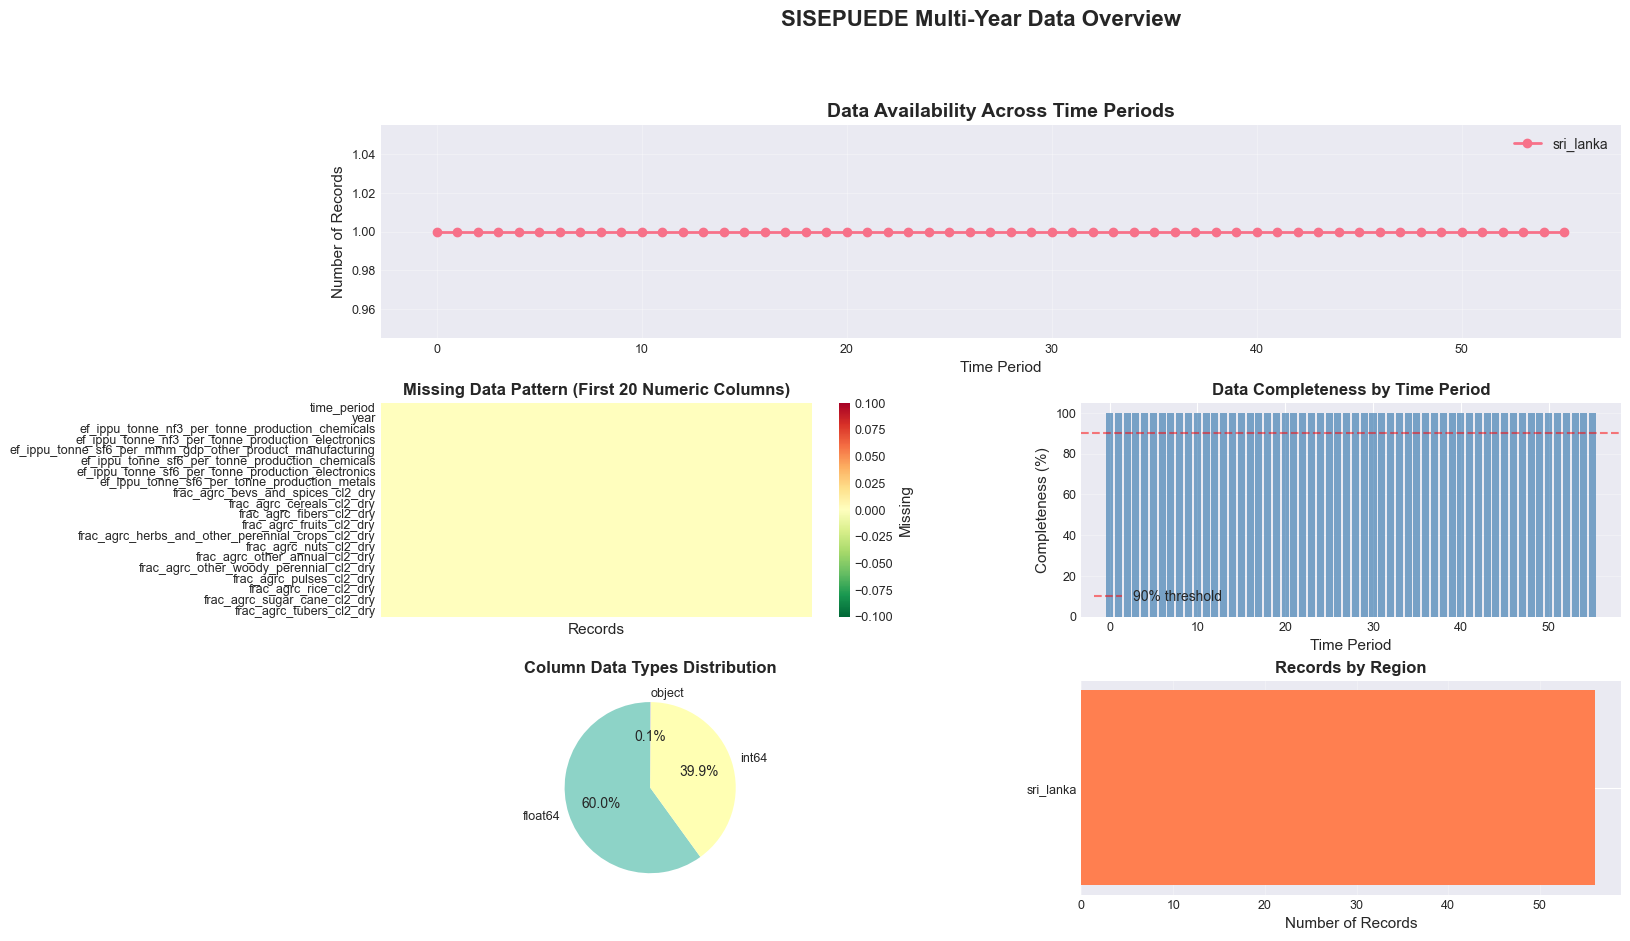

In [22]:
# CELL 22: Time Series Overview Plot
fig = plt.figure(figsize=(16, 10))
gs = GridSpec(3, 2, figure=fig, hspace=0.3, wspace=0.3)

# Plot 1: Data availability over time
ax1 = fig.add_subplot(gs[0, :])
for region in df_input['region'].unique():
    region_data = df_input[df_input['region'] == region]
    time_counts = region_data.groupby('time_period').size()
    ax1.plot(time_counts.index, time_counts.values, marker='o', label=region, linewidth=2)

ax1.set_xlabel('Time Period')
ax1.set_ylabel('Number of Records')
ax1.set_title('Data Availability Across Time Periods', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Missing data heatmap (sample columns)
ax2 = fig.add_subplot(gs[1, 0])
numeric_cols = df_input.select_dtypes(include=[np.number]).columns[:20]
missing_matrix = df_input[numeric_cols].isnull().astype(int)
sns.heatmap(missing_matrix.T, cmap='RdYlGn_r', cbar_kws={'label': 'Missing'}, 
            ax=ax2, yticklabels=True, xticklabels=False)
ax2.set_title('Missing Data Pattern (First 20 Numeric Columns)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Records')

# Plot 3: Data completeness by time period
ax3 = fig.add_subplot(gs[1, 1])
completeness_by_time = []
time_periods = sorted(df_input['time_period'].unique())
for tp in time_periods:
    tp_data = df_input[df_input['time_period'] == tp]
    completeness = (1 - tp_data.isnull().sum().sum() / (len(tp_data) * len(tp_data.columns))) * 100
    completeness_by_time.append(completeness)

ax3.bar(time_periods, completeness_by_time, color='steelblue', alpha=0.7)
ax3.axhline(y=90, color='red', linestyle='--', label='90% threshold', alpha=0.5)
ax3.set_xlabel('Time Period')
ax3.set_ylabel('Completeness (%)')
ax3.set_title('Data Completeness by Time Period', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# Plot 4: Column type distribution
ax4 = fig.add_subplot(gs[2, 0])
type_counts = df_input.dtypes.value_counts()
colors = plt.cm.Set3(range(len(type_counts)))
wedges, texts, autotexts = ax4.pie(type_counts.values, labels=type_counts.index, 
                                     autopct='%1.1f%%', colors=colors, startangle=90)
ax4.set_title('Column Data Types Distribution', fontsize=12, fontweight='bold')

# Plot 5: Regions coverage
ax5 = fig.add_subplot(gs[2, 1])
region_counts = df_input['region'].value_counts()
ax5.barh(range(len(region_counts)), region_counts.values, color='coral')
ax5.set_yticks(range(len(region_counts)))
ax5.set_yticklabels(region_counts.index)
ax5.set_xlabel('Number of Records')
ax5.set_title('Records by Region', fontsize=12, fontweight='bold')
ax5.grid(True, alpha=0.3, axis='x')

plt.suptitle('SISEPUEDE Multi-Year Data Overview', fontsize=16, fontweight='bold', y=0.995)

# Save
overview_file = FIGURES_DIR / "01_data_overview.png"
plt.savefig(overview_file, dpi=300, bbox_inches='tight')
print(f"✓ Saved: {overview_file.name}")
plt.show()

✓ Saved: 02_key_variables_timeseries.png


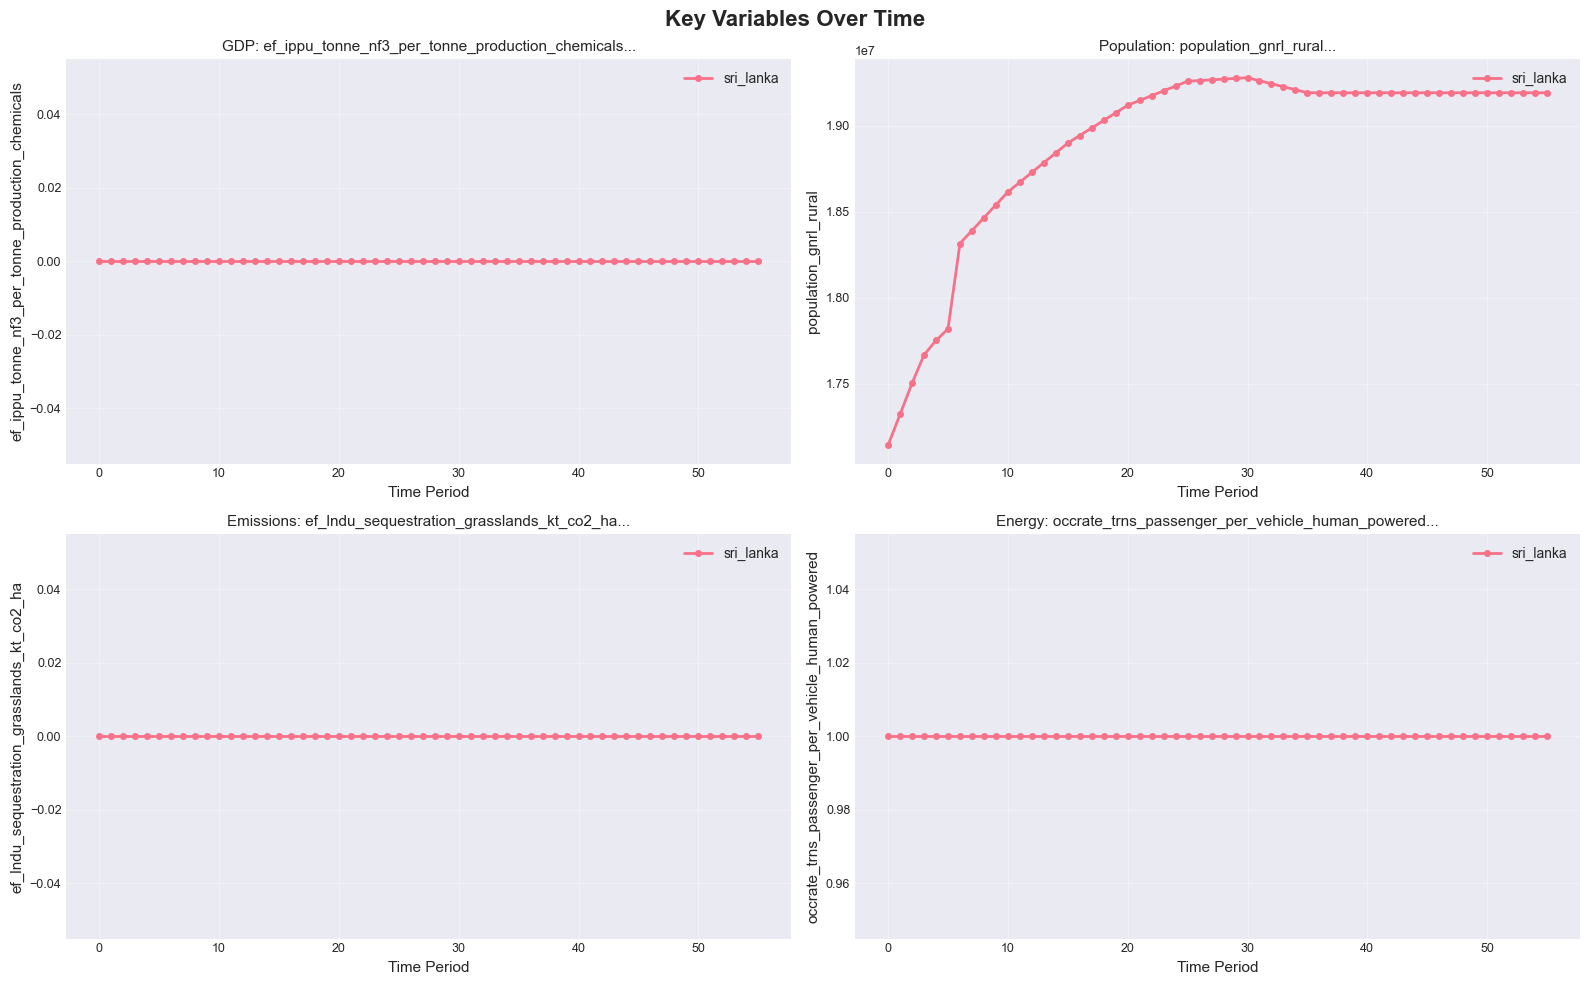

In [23]:
# CELL 23: Key Variables Time Series (if available)
# Plot key emission/economic variables over time

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Key Variables Over Time', fontsize=16, fontweight='bold')

# Define key variables to plot (adjust based on your data)
key_vars = {
    'GDP': ['gdp', 'output', 'economic', 'production'],
    'Population': ['pop', 'population', 'people'],
    'Emissions': ['emission', 'co2', 'ghg', 'ch4'],
    'Energy': ['energy', 'power', 'electricity', 'fuel']
}

for idx, (var_name, keywords) in enumerate(key_vars.items()):
    ax = axes[idx // 2, idx % 2]
    
    # Find matching columns
    matching_cols = [col for col in df_input.columns 
                     if any(kw in col.lower() for kw in keywords)]
    
    if matching_cols:
        # Plot first matching column
        col = matching_cols[0]
        
        for region in df_input['region'].unique():
            region_data = df_input[df_input['region'] == region].sort_values('time_period')
            
            # Only plot if data exists and is numeric
            if pd.api.types.is_numeric_dtype(region_data[col]):
                ax.plot(region_data['time_period'], region_data[col], 
                       marker='o', label=region, linewidth=2, markersize=4)
        
        ax.set_xlabel('Time Period')
        ax.set_ylabel(col[:50])  # Truncate long names
        ax.set_title(f'{var_name}: {col[:60]}...', fontsize=11)
        ax.legend()
        ax.grid(True, alpha=0.3)
    else:
        ax.text(0.5, 0.5, f'No {var_name} variables found', 
               ha='center', va='center', fontsize=12, color='gray')
        ax.set_title(f'{var_name}: Not Available', fontsize=11)

plt.tight_layout()

# Save
timeseries_file = FIGURES_DIR / "02_key_variables_timeseries.png"
plt.savefig(timeseries_file, dpi=300, bbox_inches='tight')
print(f"✓ Saved: {timeseries_file.name}")
plt.show()

In [24]:
# CELL 24: SISEPUEDE Subsector Coverage Heatmap
if example_loaded and len(missing) > 0:
    # Analyze which subsectors have data
    subsector_prefixes = {
        'AFOLU': ['agrc_', 'frst_', 'lndu_', 'lsmm_', 'lvst_', 'soil_'],
        'Energy': ['entc_', 'fgtv_', 'inen_', 'scoe_', 'trde_', 'trns_'],
        'IPPU': ['ippu_'],
        'Waste': ['trww_', 'wali_', 'waso_'],
        'Socioeconomic': ['gnrl_', 'econ_']
    }
    
    # Check coverage
    coverage_data = []
    for sector, prefixes in subsector_prefixes.items():
        for prefix in prefixes:
            # Count existing vs missing columns
            total = sum(1 for col in example_cols if col.startswith(prefix))
            existing = sum(1 for col in df_input.columns if col.startswith(prefix))
            missing_count = sum(1 for col in missing if col.startswith(prefix))
            
            if total > 0:
                coverage_pct = (existing / total) * 100
                coverage_data.append({
                    'Sector': sector,
                    'Subsector': prefix.rstrip('_'),
                    'Total': total,
                    'Existing': existing,
                    'Missing': missing_count,
                    'Coverage %': coverage_pct
                })
    
    df_coverage = pd.DataFrame(coverage_data)
    
    # Plot heatmap
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Coverage percentage heatmap
    pivot_coverage = df_coverage.pivot_table(
        values='Coverage %', 
        index='Subsector', 
        columns='Sector', 
        aggfunc='mean'
    )
    
    sns.heatmap(pivot_coverage, annot=True, fmt='.0f', cmap='RdYlGn', 
                vmin=0, vmax=100, ax=ax1, cbar_kws={'label': 'Coverage %'})
    ax1.set_title('SISEPUEDE Subsector Data Coverage (%)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('')
    
    # Missing columns count
    pivot_missing = df_coverage.pivot_table(
        values='Missing', 
        index='Subsector', 
        columns='Sector', 
        aggfunc='sum'
    )
    
    sns.heatmap(pivot_missing, annot=True, fmt='.0f', cmap='Reds', 
                ax=ax2, cbar_kws={'label': 'Missing Columns'})
    ax2.set_title('Missing Columns by Subsector', fontsize=14, fontweight='bold')
    ax2.set_xlabel('')
    
    plt.suptitle('SISEPUEDE Data Coverage Analysis', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    
    # Save
    coverage_file = FIGURES_DIR / "03_subsector_coverage.png"
    plt.savefig(coverage_file, dpi=300, bbox_inches='tight')
    print(f"✓ Saved: {coverage_file.name}")
    plt.show()
    
    # Print summary table
    print("\n📊 Coverage Summary by Sector:")
    sector_summary = df_coverage.groupby('Sector').agg({
        'Total': 'sum',
        'Existing': 'sum',
        'Missing': 'sum',
        'Coverage %': 'mean'
    }).round(1)
    display(sector_summary)
else:
    print("⚠ Skipping subsector coverage (example not loaded or no missing data)")

⚠ Skipping subsector coverage (example not loaded or no missing data)


C:\Users\shanp\miniconda3\envs\sisepuede\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\shanp\miniconda3\envs\sisepuede\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


✓ Saved: 04_correlation_matrix.png


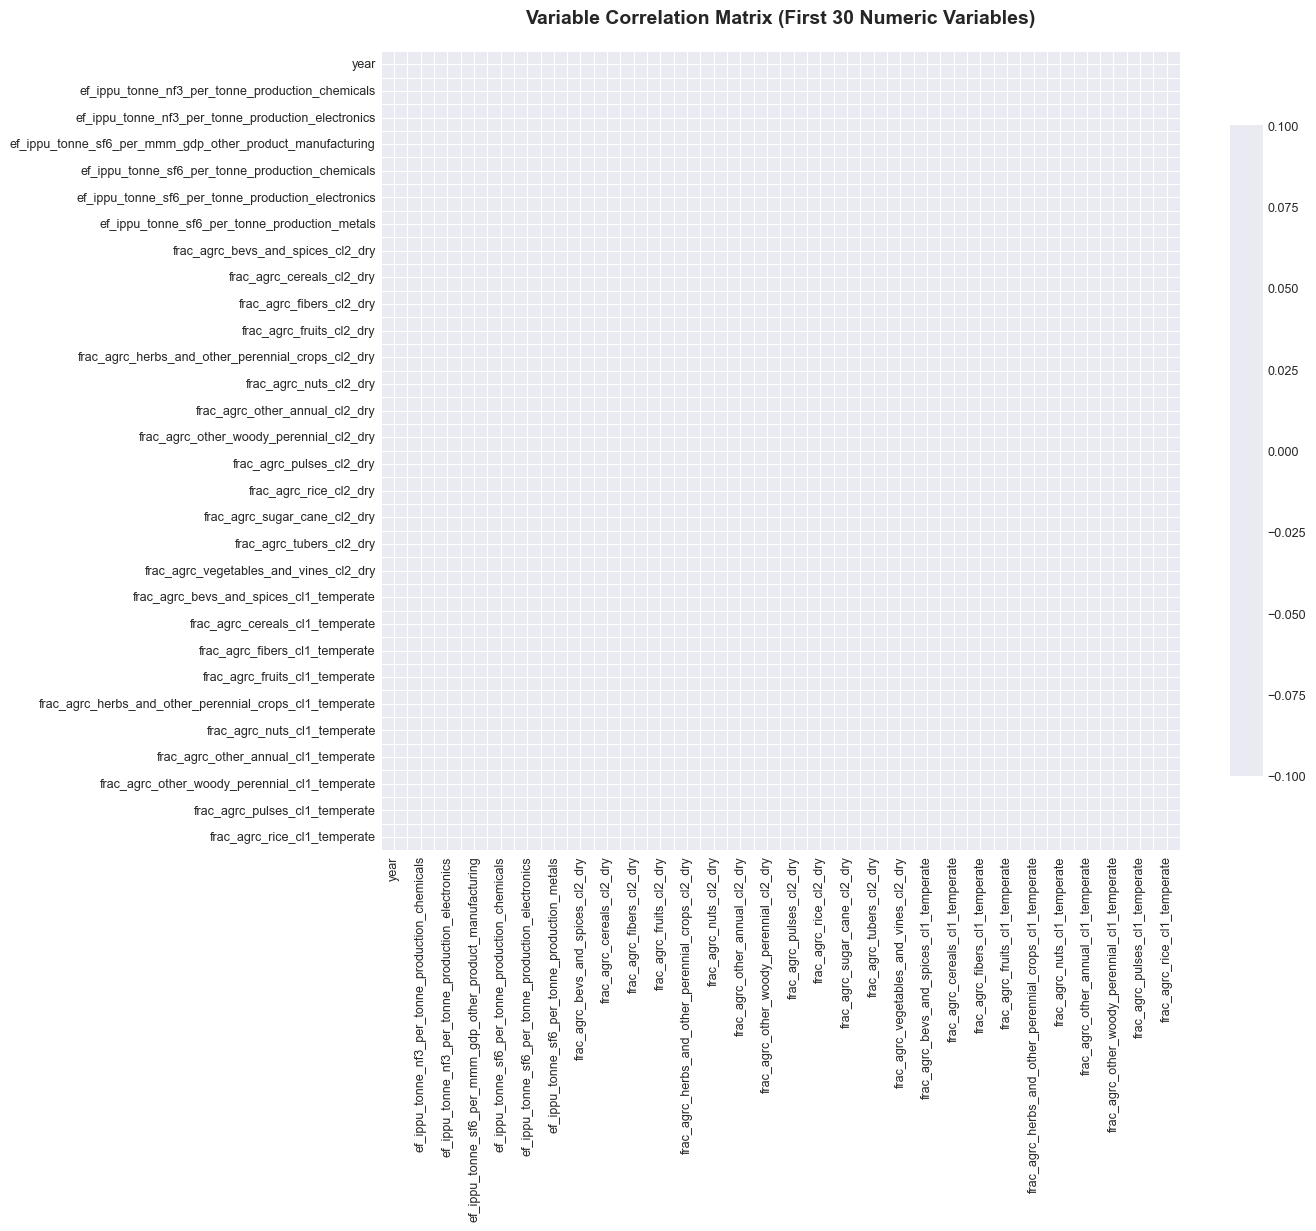

In [25]:
# CELL 25: Correlation Analysis (for numeric variables)
# Select numeric columns for correlation
numeric_cols = df_input.select_dtypes(include=[np.number]).columns
# Exclude time_period for correlation
numeric_cols = [col for col in numeric_cols if col != 'time_period']

if len(numeric_cols) > 5:
    # Calculate correlation matrix (sample if too many)
    sample_cols = numeric_cols[:min(30, len(numeric_cols))]
    corr_matrix = df_input[sample_cols].corr()
    
    # Plot
    fig, ax = plt.subplots(figsize=(14, 12))
    
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', 
                center=0, square=True, linewidths=0.5, 
                cbar_kws={"shrink": 0.8}, ax=ax)
    
    ax.set_title(f'Variable Correlation Matrix (First {len(sample_cols)} Numeric Variables)', 
                 fontsize=14, fontweight='bold', pad=20)
    
    plt.tight_layout()
    
    # Save
    corr_file = FIGURES_DIR / "04_correlation_matrix.png"
    plt.savefig(corr_file, dpi=300, bbox_inches='tight')
    print(f"✓ Saved: {corr_file.name}")
    plt.show()
    
    # Identify highly correlated pairs
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.8:
                corr_pairs.append({
                    'Var1': corr_matrix.columns[i],
                    'Var2': corr_matrix.columns[j],
                    'Correlation': corr_matrix.iloc[i, j]
                })
    
    if corr_pairs:
        df_corr_pairs = pd.DataFrame(corr_pairs).sort_values('Correlation', ascending=False)
        print("\n🔗 Highly Correlated Variable Pairs (|r| > 0.8):")
        display(df_corr_pairs.head(10))
else:
    print(f"⚠ Not enough numeric columns for correlation analysis ({len(numeric_cols)} found)")

✓ Saved: 05_distributions.png


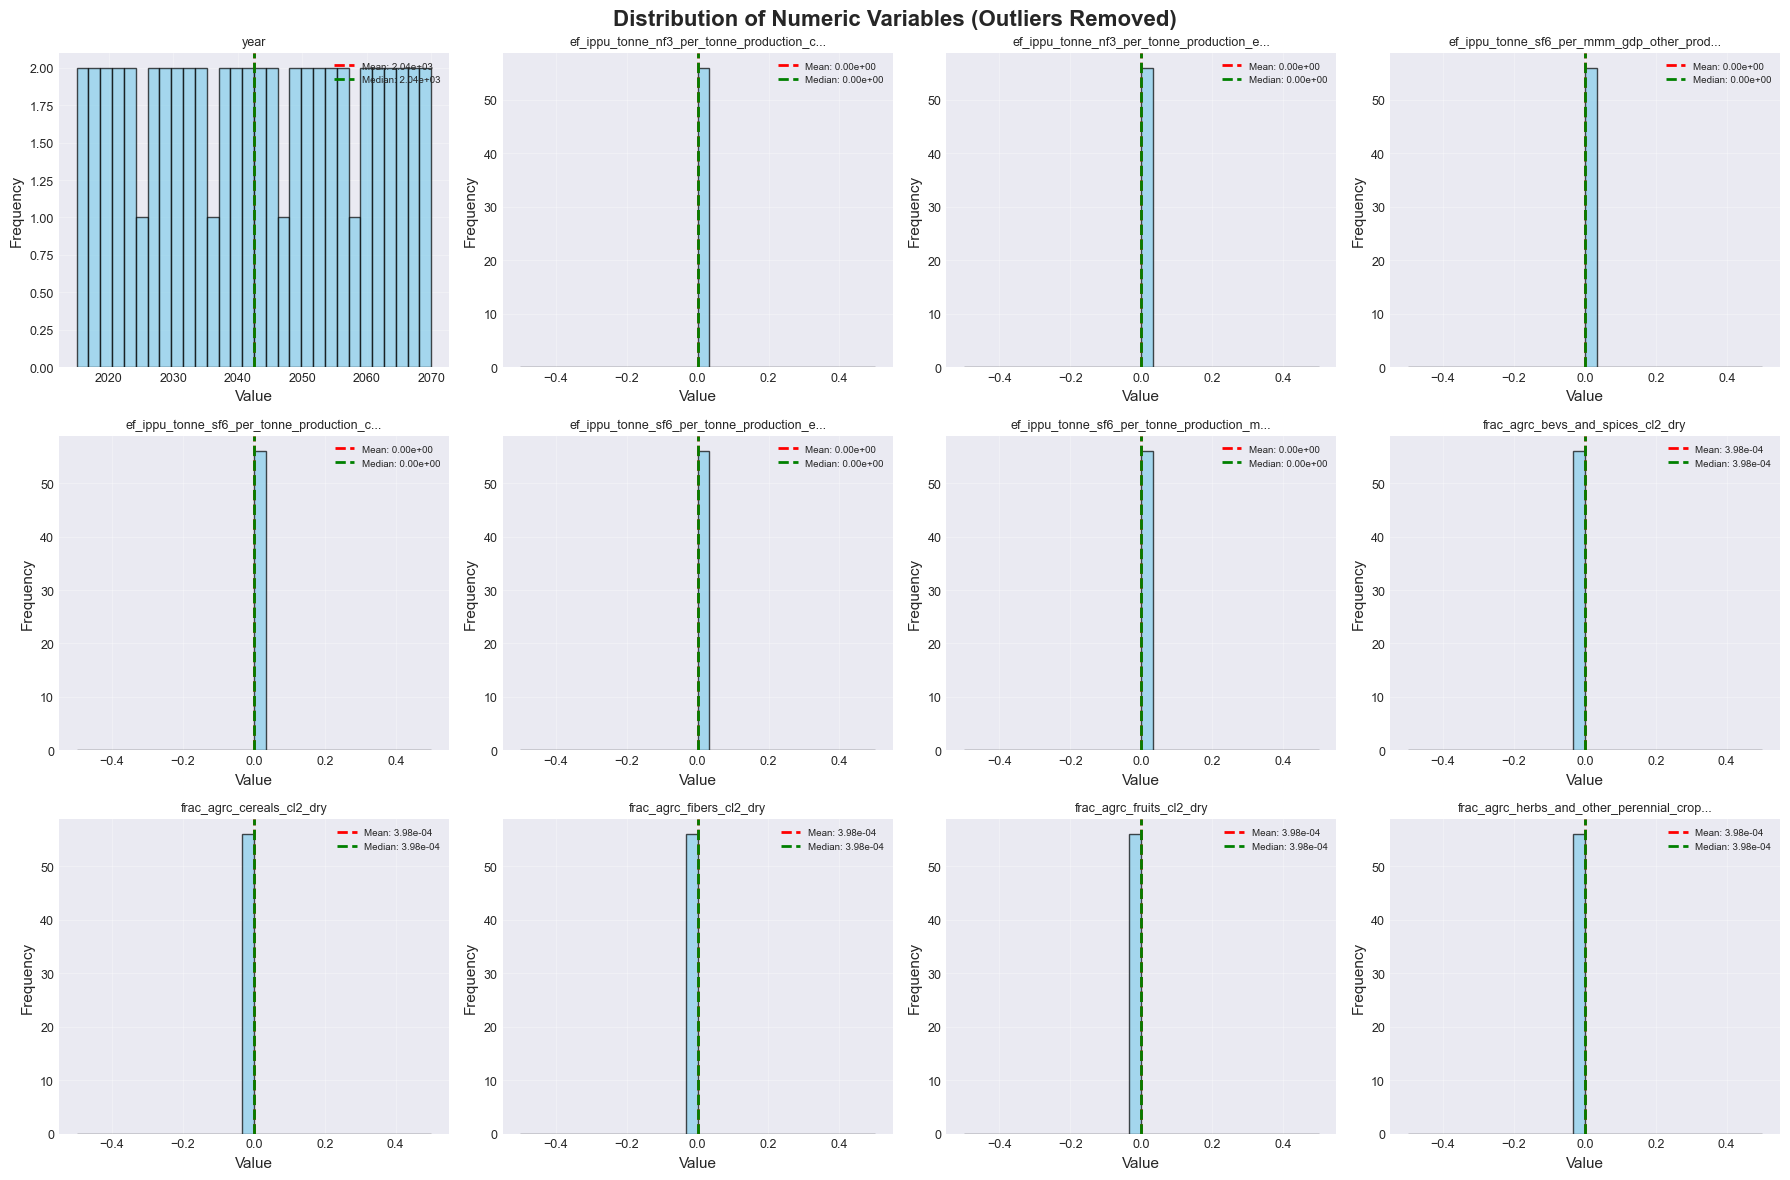

In [26]:
# CELL 26: Distribution Analysis
# Plot distributions of key numeric variables

numeric_cols = df_input.select_dtypes(include=[np.number]).columns
numeric_cols = [col for col in numeric_cols if col != 'time_period']

if len(numeric_cols) >= 4:
    # Select 12 columns for distribution plots
    sample_size = min(12, len(numeric_cols))
    sample_cols = numeric_cols[:sample_size]
    
    fig, axes = plt.subplots(3, 4, figsize=(18, 12))
    axes = axes.flatten()
    
    for idx, col in enumerate(sample_cols):
        ax = axes[idx]
        
        # Remove outliers for better visualization
        data = df_input[col].dropna()
        if len(data) > 0:
            Q1, Q3 = data.quantile([0.25, 0.75])
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
            
            if len(filtered_data) > 0:
                ax.hist(filtered_data, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
                ax.axvline(filtered_data.mean(), color='red', linestyle='--', 
                          label=f'Mean: {filtered_data.mean():.2e}', linewidth=2)
                ax.axvline(filtered_data.median(), color='green', linestyle='--', 
                          label=f'Median: {filtered_data.median():.2e}', linewidth=2)
                
                ax.set_title(col[:40] + '...' if len(col) > 40 else col, fontsize=9)
                ax.set_xlabel('Value')
                ax.set_ylabel('Frequency')
                ax.legend(fontsize=7)
                ax.grid(True, alpha=0.3)
    
    # Hide unused subplots
    for idx in range(sample_size, len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle('Distribution of Numeric Variables (Outliers Removed)', 
                 fontsize=16, fontweight='bold')
    plt.tight_layout()
    
    # Save
    dist_file = FIGURES_DIR / "05_distributions.png"
    plt.savefig(dist_file, dpi=300, bbox_inches='tight')
    print(f"✓ Saved: {dist_file.name}")
    plt.show()
else:
    print(f"⚠ Not enough numeric columns for distribution analysis")

C:\Users\shanp\AppData\Local\Temp\ipykernel_24196\4014235189.py:66: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\shanp\AppData\Local\Temp\ipykernel_24196\4014235189.py:70: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  plt.savefig(timeperiod_file, dpi=300, bbox_inches='tight')


✓ Saved: 06_time_period_analysis.png


C:\Users\shanp\miniconda3\envs\sisepuede\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


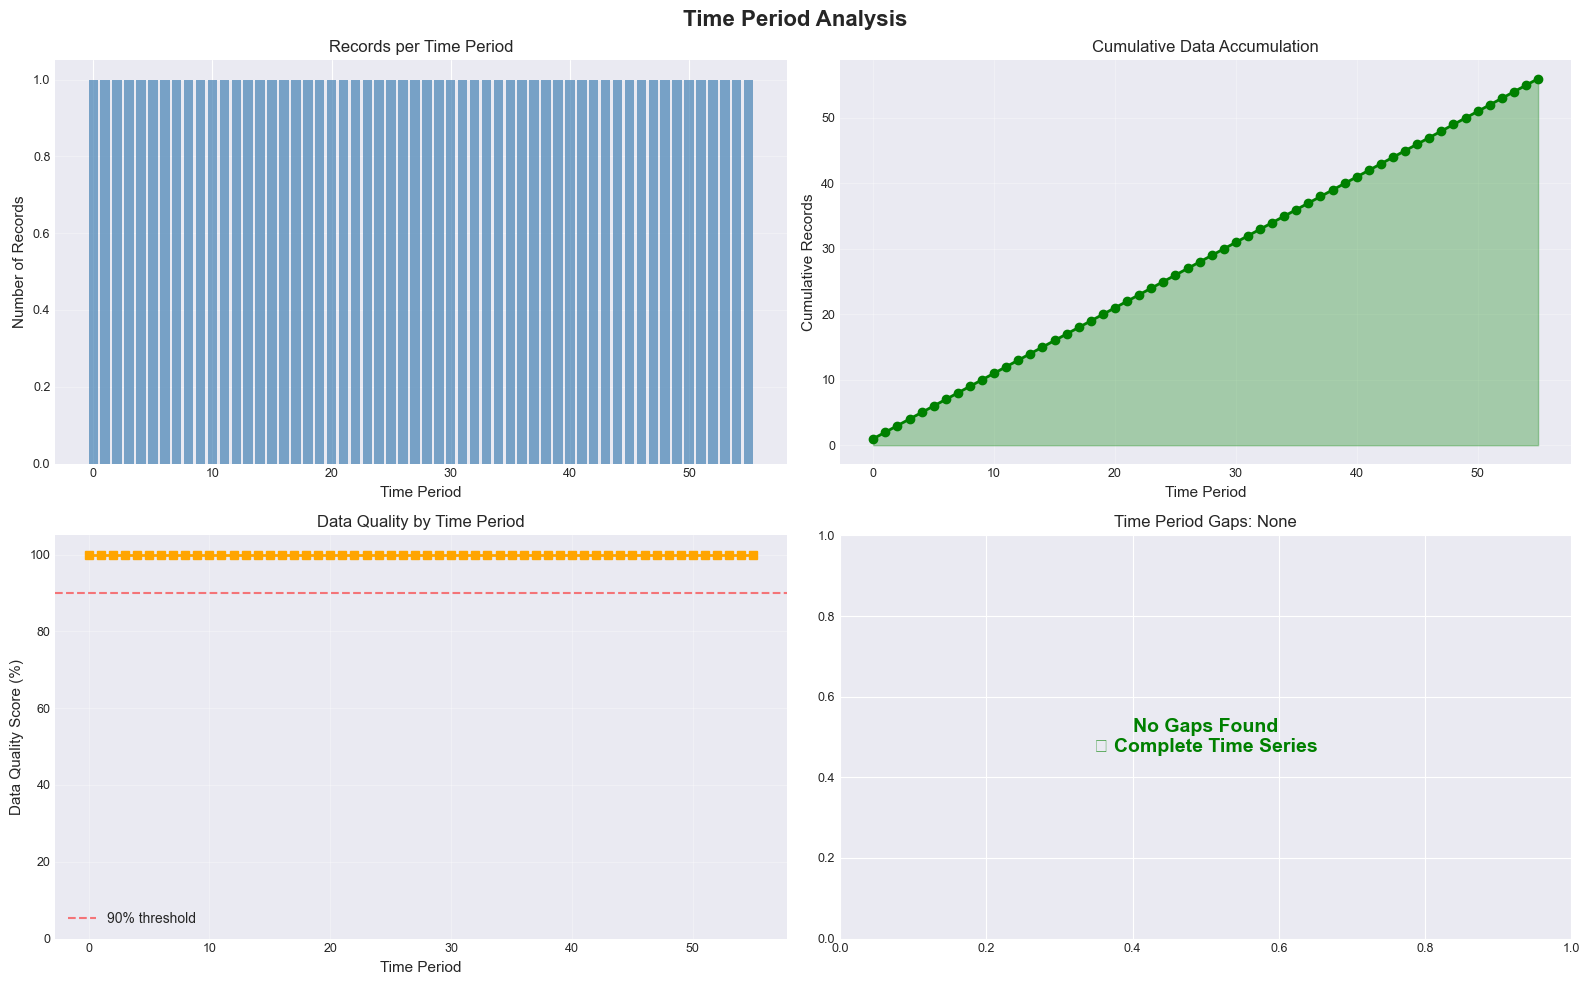

In [27]:
# CELL 27: Time Period Completeness Detailed View
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Time Period Analysis', fontsize=16, fontweight='bold')

# Plot 1: Records per time period
ax1 = axes[0, 0]
time_period_counts = df_input['time_period'].value_counts().sort_index()
ax1.bar(time_period_counts.index, time_period_counts.values, color='steelblue', alpha=0.7)
ax1.set_xlabel('Time Period')
ax1.set_ylabel('Number of Records')
ax1.set_title('Records per Time Period')
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Cumulative records over time
ax2 = axes[0, 1]
cumulative = time_period_counts.sort_index().cumsum()
ax2.plot(cumulative.index, cumulative.values, marker='o', linewidth=2, color='green')
ax2.fill_between(cumulative.index, cumulative.values, alpha=0.3, color='green')
ax2.set_xlabel('Time Period')
ax2.set_ylabel('Cumulative Records')
ax2.set_title('Cumulative Data Accumulation')
ax2.grid(True, alpha=0.3)

# Plot 3: Data quality score per time period
ax3 = axes[1, 0]
quality_scores = []
for tp in sorted(df_input['time_period'].unique()):
    tp_data = df_input[df_input['time_period'] == tp]
    # Quality = % of non-null numeric values
    numeric_data = tp_data.select_dtypes(include=[np.number])
    quality = (numeric_data.notna().sum().sum() / (len(numeric_data) * len(numeric_data.columns))) * 100
    quality_scores.append(quality)

ax3.plot(sorted(df_input['time_period'].unique()), quality_scores, 
         marker='s', linewidth=2, color='orange', markersize=6)
ax3.axhline(y=90, color='red', linestyle='--', label='90% threshold', alpha=0.5)
ax3.set_xlabel('Time Period')
ax3.set_ylabel('Data Quality Score (%)')
ax3.set_title('Data Quality by Time Period')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_ylim([0, 105])

# Plot 4: Gap analysis
ax4 = axes[1, 1]
all_periods = set(range(df_input['time_period'].min(), df_input['time_period'].max() + 1))
actual_periods = set(df_input['time_period'].unique())
missing_periods = sorted(all_periods - actual_periods)

if missing_periods:
    gap_data = pd.Series([1]*len(missing_periods), index=missing_periods)
    ax4.bar(gap_data.index, gap_data.values, color='red', alpha=0.7, label='Missing Periods')
    ax4.bar(sorted(actual_periods), [0.5]*len(actual_periods), color='green', 
            alpha=0.3, label='Available Periods')
    ax4.set_xlabel('Time Period')
    ax4.set_ylabel('Status')
    ax4.set_title(f'Time Period Gaps (Missing: {len(missing_periods)})')
    ax4.legend()
    ax4.set_yticks([])
else:
    ax4.text(0.5, 0.5, 'No Gaps Found\n✓ Complete Time Series', 
            ha='center', va='center', fontsize=14, color='green',
            transform=ax4.transAxes, weight='bold')
    ax4.set_title('Time Period Gaps: None')

plt.tight_layout()

# Save
timeperiod_file = FIGURES_DIR / "06_time_period_analysis.png"
plt.savefig(timeperiod_file, dpi=300, bbox_inches='tight')
print(f"✓ Saved: {timeperiod_file.name}")
plt.show()

In [28]:
# CELL 28: Regional Comparison (if multiple regions)
if df_input['region'].nunique() > 1:
    regions = df_input['region'].unique()
    n_regions = len(regions)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Regional Comparison Analysis', fontsize=16, fontweight='bold')
    
    # Plot 1: Time periods by region
    ax1 = axes[0, 0]
    region_time_data = []
    for region in regions:
        region_df = df_input[df_input['region'] == region]
        region_time_data.append({
            'Region': region,
            'Time Periods': region_df['time_period'].nunique(),
            'Records': len(region_df)
        })
    df_region_time = pd.DataFrame(region_time_data)
    
    x = np.arange(len(df_region_time))
    width = 0.35
    ax1.bar(x - width/2, df_region_time['Time Periods'], width, 
            label='Unique Time Periods', color='skyblue')
    ax1.bar(x + width/2, df_region_time['Records']/10, width, 
            label='Records (÷10)', color='coral')
    ax1.set_xticks(x)
    ax1.set_xticklabels(df_region_time['Region'], rotation=45, ha='right')
    ax1.set_ylabel('Count')
    ax1.set_title('Data Volume by Region')
    ax1.legend()
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Plot 2: Data completeness by region
    ax2 = axes[0, 1]
    completeness_by_region = []
    for region in regions:
        region_df = df_input[df_input['region'] == region]
        numeric_cols = region_df.select_dtypes(include=[np.number]).columns
        completeness = (region_df[numeric_cols].notna().sum().sum() / 
                       (len(region_df) * len(numeric_cols))) * 100
        completeness_by_region.append(completeness)
    
    bars = ax2.barh(regions, completeness_by_region, color='mediumseagreen', alpha=0.7)
    ax2.axvline(x=90, color='red', linestyle='--', label='90% threshold', alpha=0.5)
    ax2.set_xlabel('Completeness (%)')
    ax2.set_title('Data Completeness by Region')
    ax2.legend()
    ax2.grid(True, alpha=0.3, axis='x')
    
    # Add value labels on bars
    for i, (bar, val) in enumerate(zip(bars, completeness_by_region)):
        ax2.text(val + 1, i, f'{val:.1f}%', va='center', fontsize=9)
    
    # Plot 3: Sample variable comparison across regions
    ax3 = axes[1, 0]
    # Find a numeric variable that exists across all regions
    numeric_cols = df_input.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 1:
        sample_var = numeric_cols[1]  # Skip time_period
        for region in regions:
            region_data = df_input[df_input['region'] == region].sort_values('time_period')
            if sample_var in region_data.columns:
                ax3.plot(region_data['time_period'], region_data[sample_var], 
                        marker='o', label=region, linewidth=2)
        ax3.set_xlabel('Time Period')
        ax3.set_ylabel(sample_var[:50])
        ax3.set_title(f'Cross-Regional Comparison: {sample_var[:60]}...')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
    else:
        ax3.text(0.5, 0.5, 'No suitable variable for comparison', 
                ha='center', va='center', transform=ax3.transAxes)
    
    # Plot 4: Missing data by region
    ax4 = axes[1, 1]
    missing_by_region = []
    for region in regions:
        region_df = df_input[df_input['region'] == region]
        missing_pct = (region_df.isnull().sum().sum() / 
                      (len(region_df) * len(region_df.columns))) * 100
        missing_by_region.append(missing_pct)
    
    ax4.bar(regions, missing_by_region, color='salmon', alpha=0.7)
    ax4.set_ylabel('Missing Data (%)')
    ax4.set_title('Missing Data by Region')
    ax4.set_xticklabels(regions, rotation=45, ha='right')
    ax4.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    
    # Save
    regional_file = FIGURES_DIR / "07_regional_comparison.png"
    plt.savefig(regional_file, dpi=300, bbox_inches='tight')
    print(f"✓ Saved: {regional_file.name}")
    plt.show()
else:
    print("⚠ Only one region found - skipping regional comparison")

⚠ Only one region found - skipping regional comparison


✓ Saved: 08_outlier_detection.png


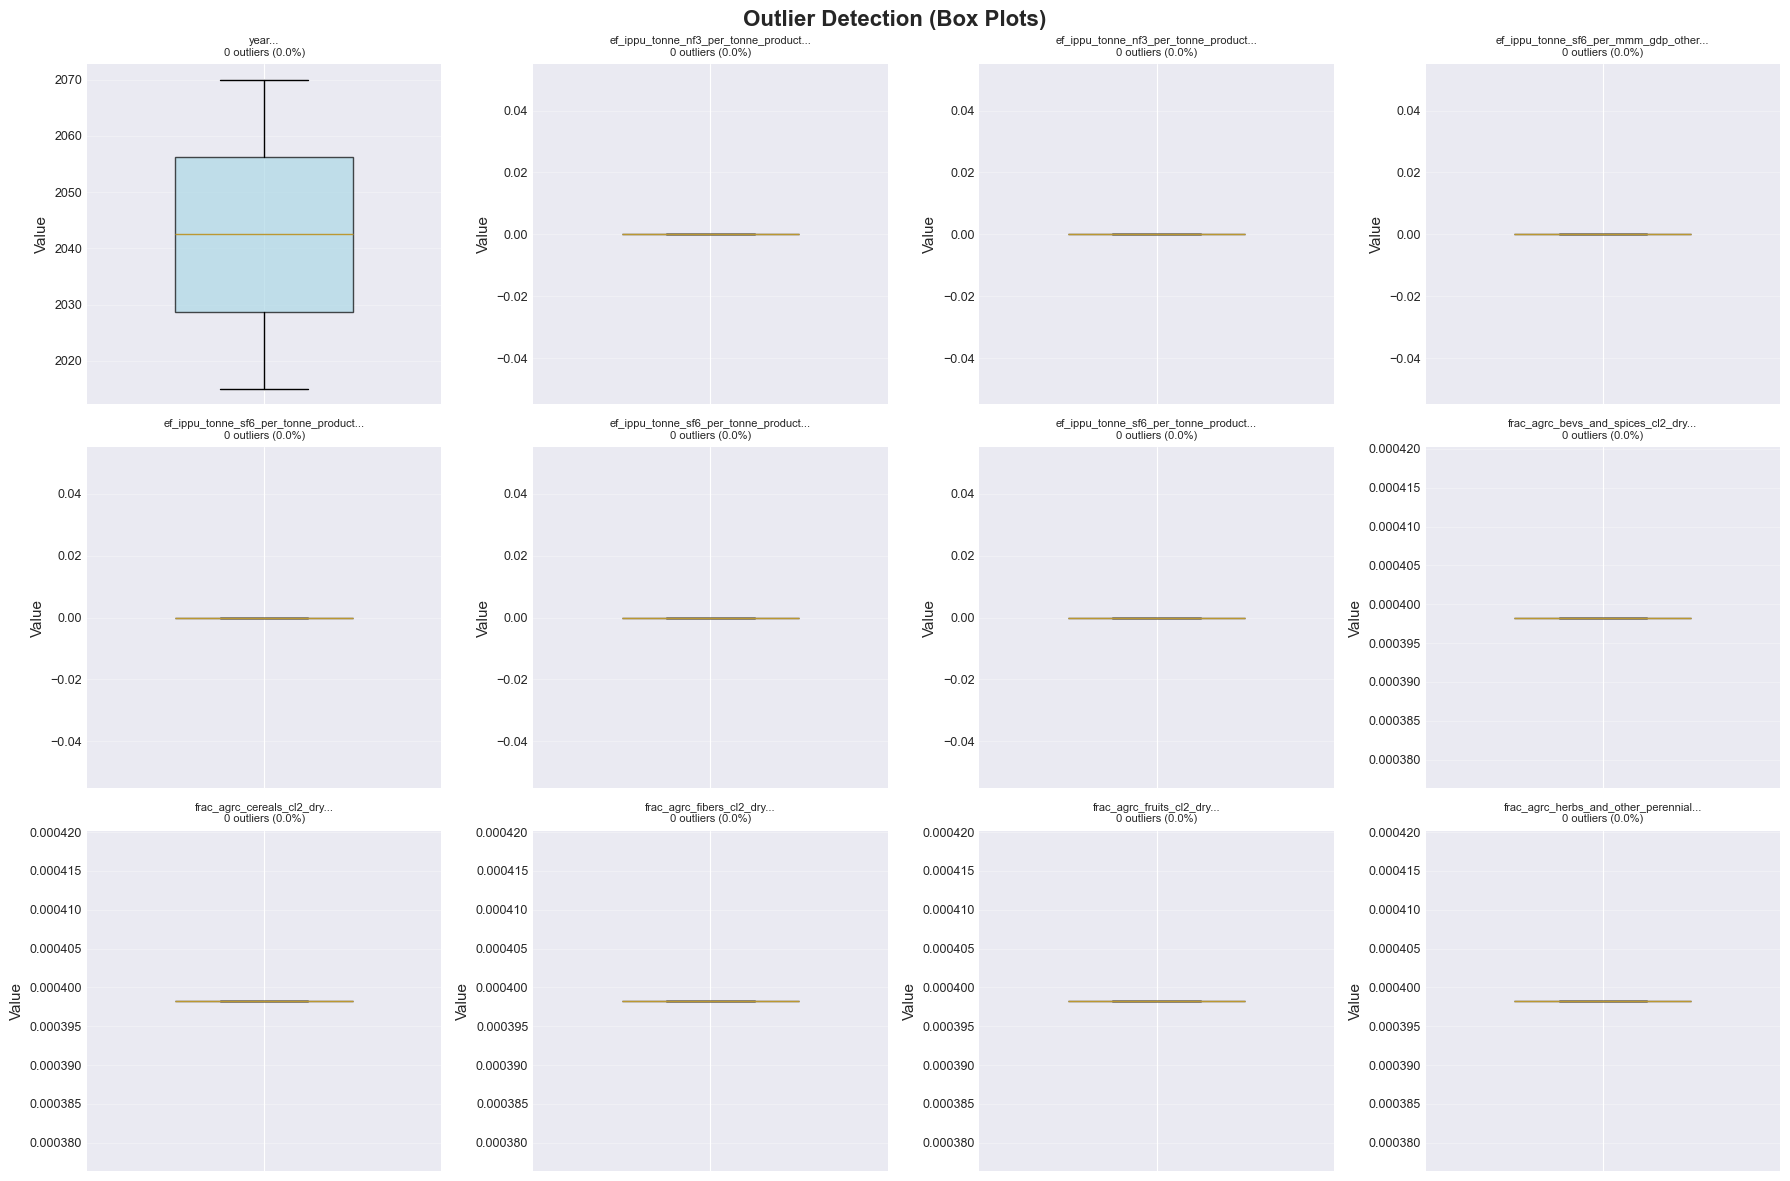


🎯 Outlier Summary (Top 10 variables):


,Variable,Total,Outliers,Outlier %
0,year,56,0,0.0
1,ef_ippu_tonne_nf3_per_tonne_production_chemicals,56,0,0.0
2,ef_ippu_tonne_nf3_per_tonne_production_electro...,56,0,0.0
3,ef_ippu_tonne_sf6_per_mmm_gdp_other_product_ma...,56,0,0.0
4,ef_ippu_tonne_sf6_per_tonne_production_chemicals,56,0,0.0
5,ef_ippu_tonne_sf6_per_tonne_production_electro...,56,0,0.0
6,ef_ippu_tonne_sf6_per_tonne_production_metals,56,0,0.0
7,frac_agrc_bevs_and_spices_cl2_dry,56,0,0.0
8,frac_agrc_cereals_cl2_dry,56,0,0.0
9,frac_agrc_fibers_cl2_dry,56,0,0.0


In [29]:
# CELL 29: Outlier Detection and Visualization
numeric_cols = df_input.select_dtypes(include=[np.number]).columns
numeric_cols = [col for col in numeric_cols if col != 'time_period']

if len(numeric_cols) >= 6:
    sample_cols = numeric_cols[:min(12, len(numeric_cols))]
    
    fig, axes = plt.subplots(3, 4, figsize=(18, 12))
    axes = axes.flatten()
    
    outlier_summary = []
    
    for idx, col in enumerate(sample_cols):
        ax = axes[idx]
        data = df_input[col].dropna()
        
        if len(data) > 0:
            # Calculate outliers using IQR method
            Q1, Q3 = data.quantile([0.25, 0.75])
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = data[(data < lower_bound) | (data > upper_bound)]
            outlier_pct = (len(outliers) / len(data)) * 100
            
            outlier_summary.append({
                'Variable': col,
                'Total': len(data),
                'Outliers': len(outliers),
                'Outlier %': outlier_pct
            })
            
            # Box plot
            bp = ax.boxplot([data], vert=True, patch_artist=True, widths=0.5)
            bp['boxes'][0].set_facecolor('lightblue')
            bp['boxes'][0].set_alpha(0.7)
            
            ax.set_title(f'{col[:35]}...\n{len(outliers)} outliers ({outlier_pct:.1f}%)', 
                        fontsize=8)
            ax.set_ylabel('Value')
            ax.grid(True, alpha=0.3, axis='y')
            ax.set_xticklabels([''])
    
    # Hide unused subplots
    for idx in range(len(sample_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle('Outlier Detection (Box Plots)', fontsize=16, fontweight='bold')
    plt.tight_layout()
    
    # Save
    outlier_file = FIGURES_DIR / "08_outlier_detection.png"
    plt.savefig(outlier_file, dpi=300, bbox_inches='tight')
    print(f"✓ Saved: {outlier_file.name}")
    plt.show()
    
    # Print outlier summary
    df_outliers = pd.DataFrame(outlier_summary).sort_values('Outlier %', ascending=False)
    print("\n🎯 Outlier Summary (Top 10 variables):")
    display(df_outliers.head(10))
else:
    print("⚠ Not enough numeric columns for outlier analysis")

In [30]:
# CELL 30: Generate Comprehensive Report Dashboard
fig = plt.figure(figsize=(20, 12))
gs = GridSpec(4, 3, figure=fig, hspace=0.4, wspace=0.3)

# Title
fig.suptitle(f'SISEPUEDE Data Preparation Dashboard - {pd.Timestamp.now().strftime("%Y-%m-%d %H:%M")}', 
             fontsize=18, fontweight='bold', y=0.98)

# 1. Overall Statistics
ax1 = fig.add_subplot(gs[0, :])
ax1.axis('off')
stats_text = f"""
📊 DATASET OVERVIEW
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Total Records: {len(df_input):,}  |  Total Variables: {len(df_input.columns):,}  |  Regions: {df_input['region'].nunique()}  |  Time Periods: {df_input['time_period'].nunique()} ({df_input['time_period'].min()} to {df_input['time_period'].max()})
Memory Usage: {df_input.memory_usage(deep=True).sum() / 1024**2:.1f} MB  |  Numeric Columns: {len(df_input.select_dtypes(include=[np.number]).columns)}  |  Missing Data: {(df_input.isnull().sum().sum() / (len(df_input) * len(df_input.columns)) * 100):.2f}%
"""
ax1.text(0.05, 0.5, stats_text, fontsize=11, family='monospace', 
         verticalalignment='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

# 2. Time Period Coverage
ax2 = fig.add_subplot(gs[1, 0])
time_counts = df_input.groupby('time_period').size()
ax2.fill_between(time_counts.index, time_counts.values, alpha=0.6, color='steelblue')
ax2.plot(time_counts.index, time_counts.values, color='darkblue', line

SyntaxError: incomplete input (1806889829.py, line 25)